# Đồ án cuối kì môn lập trình khoa học dữ liệu

# A. Thu thập dữ liệu
I. Giới thiệu chủ đề và thông tin tập dữ liệu
1. Chủ đề
Tên chủ đề: 

2. Lý do lựa chọn chủ đề và tập dữ liệu


3. Thông tin tập dữ liệu

II. Tổng quan về cấu trúc tập dữ liệu
1. Thời điểm thu thập dữ liệu
Tập dữ liệu được nhóm thống nhất tải ở dạng file csv vào ngày 24/12/2022

Dữ liệu gồm  dòng và  cột

2. Cấu trúc tập dữ liệu
Tập dữ liệu được tải xuống chỉ chứa duy nhất 1 bảng, gồm 15 thuộc tính.

# B. Khám phá dữ liệu


# 1. Đọc dữ liệu và tính số dòng, số cột
Import các thư viện cần thiết


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')

Đọc file DataScientist.csv và in ra 5 dòng đầu tiên



In [3]:
df = pd.read_csv('archive/data.csv')
df.head(5)

,id_examinee,math,physics,chemistry,biology,history,geography,literature,civic_education,english,russian,french,chinese,german,japanese
0,1000002,9.2,NaN,NaN,NaN,5.75,9.75,8.25,9.25,10.0,NaN,NaN,NaN,NaN,NaN
1,1000003,4.4,NaN,NaN,NaN,4.25,4.00,6.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1000004,8.4,4.00,3.00,3.50,NaN,NaN,6.75,NaN,10.0,NaN,NaN,NaN,NaN,NaN
3,1000005,8.8,8.25,5.75,5.25,NaN,NaN,8.25,NaN,9.4,NaN,NaN,NaN,NaN,NaN
4,1000006,8.0,NaN,NaN,NaN,5.00,6.50,8.75,9.25,8.6,NaN,NaN,NaN,NaN,NaN


tính số dòng và cột của data

In [4]:
num_rows,num_cols = df.shape
print(f'Number of rows: {num_rows}\nNumber of columns: {num_cols}')

Number of rows: 934617
Number of columns: 15


Vậy dataframe gồm 934617 dòng và 15 cột

# 2. Mỗi dòng có ý nghĩa gì? Có vấn đề các dòng có ý nghĩa khác nhau không?
Mỗi dòng trong tập dữ liệu là thông tin về điểm thi THPT 2021 của thí sinh . Có vẻ không có vấn đề các dòng có ý nghĩa khác nhau, tức là không có dòng nào bị 'lạc loài'



# 3. Dữ liệu có dòng nào bị lặp không?
Ta kiểm tra xem có dòng nào bị lặp không bằng cách sử dụng duplicated() và any() trên dataframe df và lưu kết quả vào biến have_duplicated_rows. Biến này sẽ có giá trị True nếu dữ liệu có các dòng bị lặp và có giá trị False nếu không có dòng bị lặp.



In [5]:
have_duplicate_rows = df.duplicated().any()
have_duplicate_rows

False

Như vậy, dữ liệu không có dòng nào bị lặp



# 4. Tỉ lệ giá trị thiếu của mỗi cột
Ta cần xem xét đến các giá trị thiếu trong dữ liệu. Đầu tiên, ta tính tỉ lệ giá trị thiếu của từng cột bằng cách sử dụng phương thức isnull() trên dataframe df và tính tổng số giá trị thiếu của từng cột bằng phương thức sum(). Cuối cùng ta chia số dòng và lưu kết quả vào missing_ratio.



In [6]:
missing_ratio = df.isnull().sum()
missing_ratio = missing_ratio / num_rows
missing_ratio

id_examinee        0.000000
math               0.010663
physics            0.651103
chemistry          0.649407
biology            0.654969
history            0.356938
geography          0.362893
literature         0.013563
civic_education    0.460595
english            0.125568
russian            0.999890
french             0.999173
chinese            0.997787
german             0.999883
japanese           0.998962
dtype: float64

Ta cũng cần tính các giá trị thống kê mô tả của các cột numeric bằng phương thức describe() trên dataframe df.



In [7]:
df.describe()

,id_examinee,math,physics,chemistry,biology,history,geography,literature,civic_education,english,russian,french,chinese,german,japanese
count,9.346170e+05,924651.000000,326085.000000,327670.000000,322472.000000,601017.000000,595451.000000,921941.000000,504137.000000,817259.000000,103.000000,773.000000,2068.000000,109.000000,970.000000
mean,2.653449e+07,6.616537,6.575871,6.631933,5.515856,4.976247,6.957057,6.479846,8.376190,5.850131,8.601942,7.872704,7.820890,7.266055,6.677113
std,1.928573e+07,1.683284,1.391438,1.597064,1.442461,1.771093,1.179061,1.364677,1.157226,2.217574,1.449677,1.953273,2.076129,1.728424,2.279933
min,1.000002e+06,0.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.600000,2.000000,1.200000,2.200000,1.200000
25%,7.000532e+06,5.400000,5.750000,5.500000,4.500000,3.500000,6.250000,5.750000,7.750000,4.000000,8.200000,6.600000,6.800000,6.400000,4.800000
50%,2.700864e+07,7.000000,6.750000,7.000000,5.500000,4.750000,7.000000,6.500000,8.500000,5.600000,9.200000,8.400000,8.600000,7.600000,7.200000
75%,4.200997e+07,8.000000,7.750000,7.750000,6.500000,6.250000,7.750000,7.500000,9.250000,7.800000,9.600000,9.600000,9.400000,8.600000,8.800000
max,6.400684e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


# 5. Kiểu dữ liệu của mỗi cột? Có cột nào có kiểu dữ liệu chưa phù hợp để xử lý tiếp không?


In [8]:
col_dtype = df.dtypes
col_dtype
# df.loc[df['id_examinee']>6500000]


id_examinee          int64
math               float64
physics            float64
chemistry          float64
biology            float64
history            float64
geography          float64
literature         float64
civic_education    float64
english            float64
russian            float64
french             float64
chinese            float64
german             float64
japanese           float64
dtype: object

# Nhận xét
Về mặt kiểu dữ liệu, các thuộc tính của tập dữ liệu này đã ở định dạng phù hợp.

# 6. Mỗi cột có ý nghĩa gì?
Ý nghĩa mỗi thuộc tính trong dataframe:
- id_examinee: id thí sinh dự thi
- math: điểm toán
- physics: điểm lí
- chemistry: điểm hóa
- biology: điểm sinh
- history: điểm sử
- geography: điểm địa lí
- literature: điểm ngữ văn
- civic_education: điểm gdcd
- english: điểm tiếng Anh
- russian: điểm tiếng Nga
- french: điểm tiếng Fáp
- german: điểm tiếng Duck
- japanese: điểm tiếng Nhật

# 7. Với mỗi cột có kiểu dữ liệu số, các giá trị được phân bố như thế nào?
Với các cột có kiểu dữ liệu số, ta sẽ tính:

- Tỉ lệ % (từ 0 đến 100) các giá trị thiếu
- Giá trị min
- Giá trị lower quartile (phân vị 25)
- Giá trị median (phân vị 50)
- Giá trị upper quartile (phân vị 75)
- Giá trị max

Ta sẽ lưu kết quả vào DataFrame num_col_info_df, trong đó:

- Tên của các cột là tên của các cột số trong df
- Tên của các dòng là: "missing_ratio", "min", "lower_quartile", "median", "upper_quartile", "max"

In [9]:
data = {
    "row_name" : ["missing_ratio", "min", "lower_quartile", "median", "upper_quartile", "max"]
}
col_name = []
for i in df.columns:
    if (df[i].dtypes == 'float64') or (df[i].dtypes == 'int64'):
        col_name.append(i)

for i in col_name:
    _data = []
    missing_data = df[i].isna().sum()
    _data.append((missing_data / len(df[i]) * 100).round(1))
    _data.append(df[i].min())
    percentile = df[i].quantile([0.25,0.5,0.75])
    _data.append(percentile[0.25])
    _data.append(percentile[0.5])
    _data.append(percentile[0.75])
    _data.append(df[i].max())
    data[i] = _data
num_col_info_df = pd.DataFrame(data).set_index('row_name')

In [10]:
num_col_info_df

,id_examinee,math,physics,chemistry,biology,history,geography,literature,civic_education,english,russian,french,chinese,german,japanese
row_name,,,,,,,,,,,,,,,
missing_ratio,0.0,1.1,65.10,64.90,65.5,35.70,36.30,1.40,46.10,12.6,100.0,99.9,99.8,100.0,99.9
min,1000002.0,0.6,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.0,3.6,2.0,1.2,2.2,1.2
lower_quartile,7000532.0,5.4,5.75,5.50,4.5,3.50,6.25,5.75,7.75,4.0,8.2,6.6,6.8,6.4,4.8
median,27008636.0,7.0,6.75,7.00,5.5,4.75,7.00,6.50,8.50,5.6,9.2,8.4,8.6,7.6,7.2
upper_quartile,42009973.0,8.0,7.75,7.75,6.5,6.25,7.75,7.50,9.25,7.8,9.6,9.6,9.4,8.6,8.8
max,64006838.0,10.0,10.00,10.00,10.0,10.00,10.00,10.00,10.00,10.0,10.0,10.0,10.0,10.0,10.0


***Có giá trị không hợp lệ trong mỗi cột không? (không xét giá trị thiếu)**

Không có giá trị không hợp lệ trong mỗi cột và toàn bộ dữ liệu đều có kiểu dữ liệu dạng int64 hoặc float64

# Câu hỏi: Đánh giá số lượng học sinh đậu tốt nghiệp của các tỉnh: 

## Liệt kê tên  các tỉnh có trong bộ data: 

    Theo mô tả của bộ data thì 2 chữ số đầu trong cột 'id_examinee' là id của tỉnh. Do đó để biết được điểm của từng tỉnh thì chúng ta phải lấy được danh sách các tỉnh qua từ đó so sánh với mã tỉnh và lưu về data riêng của mỗi tỉnh.

In [11]:
Provinces_Id = pd.read_csv('archive/Matinh.txt',names=['ID']);
Provinces_Id

,ID
0,Mã tỉnh: 01 - Hà nội
1,Mã tỉnh: 02 - TP. Hồ Chí Minh
2,Mã tỉnh: 03 - Hải Phòng
3,Mã tỉnh: 04 - Đà Nẵng
4,Mã tỉnh: 05 - Hà Giang
...,...
58,Mã tỉnh: 60 – Bạc Liêu
59,Mã tỉnh: 61 – Cà Mau
60,Mã tỉnh: 62 – Điện Biên
61,Mã tỉnh: 63 – Đăk Nông


    Xử lý file text thành file .csv cho dễ xử lý sau này.

In [12]:
Id_col=[]
Name_col=[]
Matinh={}
for i in Provinces_Id.ID:
    i=i.replace('Mã tỉnh: ','')
    string = i.replace(' – ','-')
    string = string.replace(' - ','-')
    string = string.split('-')
    Matinh[int(string[0].replace(' ',''))] = string[1]

## Xử lí dữ liệu ở cột ID_examinee: 

## Tính tỉ lệ đậu tốt nghiệp của các tỉnh: 
    + Ở đây sẽ có 2 chương trình để xét tốt nghiệp đó là chương trình Giáo dục thường xuyên và chương trình Chính quy.
    + Đối với giáo dục thường xuyên thì sẽ không cần xét bài thi ngoại ngữ tức là các môn tiếng anh, tiếng nhật, tiếng pháp,...
    + Còn với chương trình chính quy sẽ phải tính cả điểm bài thi ngoại ngữ.
    + Cách xét điểm chuẩn đậu tốt nghiệp là tất cả các bài thi phải có điểm >=1 và điểm 2 môn bắt buộc( sẽ là 3 nếu là chương trình Chính quy) cùng với điểm của ban mà thí sinh dự thi có trung bình >=5 
    + Cách xét thông thường sẽ có điểm trung bình của lớp 12 nhưng ở đây sẽ chỉ xét điểm thi THPT.

In [13]:
score = df

def TiLeTotNghiep():
    score_department = score.dropna(thresh=6)
    score_department.insert(loc=15,column='Language', value=np.zeros(822834))
    score_department.english = score_department.english.fillna(0)
    score_department.russian = score_department.russian.fillna(0)
    score_department.french = score_department.french.fillna(0)
    score_department.chinese = score_department.chinese.fillna(0)
    score_department.german = score_department.german.fillna(0)
    score_department.japanese = score_department.japanese.fillna(0)
    score_department.Language = score_department.english + score_department.russian + score_department.french + score_department.chinese + score_department.german + score_department.japanese
    temp = score_department
    score_department_GDTX = temp[temp.Language == 0].drop(['Language','english','russian','french','chinese','german', 'japanese'],axis=1)
    score_department_GDTX=score_department_GDTX.dropna(thresh=5)
    TiLe={}
    for i in Matinh.keys():
        TiLe[Matinh[i]] = len(score_department[((((score_department["math"] + score_department["literature"] + score_department["Language"] 
                                                   + (score_department["physics"] + score_department["chemistry"] + score_department["biology"])/3)/4) >=5) 
                                                    & (int(i) == score_department["id_examinee"] // 1000000))])
        TiLe[Matinh[i]] += len(score_department[((((score_department["math"] + score_department["literature"] + score_department["Language"] 
                                                    + (score_department["geography"] + score_department["history"] + score_department["civic_education"])/3)/4) >=5) 
                                                     & (int(i) == score_department["id_examinee"] // 1000000))])
        
        TiLe[Matinh[i]] += len(score_department_GDTX[((((score_department_GDTX["math"] +  score_department_GDTX["literature"]  
                                                         + ( score_department_GDTX["physics"] +  score_department_GDTX["chemistry"] +  score_department_GDTX["biology"])/3)/3) >=5) 
                                                          & (int(i) == score_department_GDTX["id_examinee"] // 1000000))])
        TiLe[Matinh[i]] += len(score_department_GDTX[((((score_department_GDTX["math"] + score_department_GDTX["literature"]  
                                                         + (score_department_GDTX["geography"] + score_department["history"] + score_department_GDTX["civic_education"])/3)/4) >=5) 
                                                         & (int(i) == score_department_GDTX["id_examinee"] // 1000000))])
#         print(type(TiLe[Matinh[i]]))
        if (TiLe[Matinh[i]]!=0):
            TiLe[Matinh[i]] /= len(score_department[(int(i) == score_department["id_examinee"] // 1000000)])
    return TiLe
Tile_2021 = TiLeTotNghiep()

### Vẽ biểu đồ để quan sát dữ liệu: 
Vì dữ liệu là 64 tỉnh nên dữ liệu cột quá nhiều để hiển thị. Vì thế để tiện quan sát thì ở đây em sẽ chỉ hiển thị 10 cột dàn đều theo tỉ lệ đậu tốt nghiệp giảm dần để tiện quan sát.
Và trong bộ dữ liệu này không có dữ liệu điểm thi của các thí sinh ở tỉnh Đồng Thápnên kết quả khi tính toán tỉ lệ đậu của Đồng Tháp = 0 vì vậy chúng em sẽ không đề cập đến tỉ lệ của tỉnh Đồng Tháp

{'Hà nội': 0.9172211417067595, 'TP. Hồ Chí Minh': 0.9741686119934178, 'Hải Phòng': 0.9238260534181854, 'Đà Nẵng': 0.8683167444728266, 'Hà Giang': 0.5124748490945674, 'Cao Bằng': 0.6232464929859719, 'Lai Châu': 0.8239664082687338, 'Lào Cai': 0.8781645569620253, 'Tuyên Quang': 0.8028399095250063, 'Lạng Sơn': 0.795958535625246, 'Bắc Kạn': 0.7967269595176572, 'Thái Nguyên': 0.8561910465638569, 'Yên Bái': 0.8257996696200631, 'Sơn La': 0.7030366492146597, 'Phú Thọ': 0.9288599640933572, 'Vĩnh Phúc': 0.9832029013170452, 'Quảng Ninh': 0.8362831858407079, 'Bắc Giang': 0.8441011235955056, 'Bắc Ninh': 0.911346275141916, 'Hải Dương': 0.9380201489268506, 'Hưng Yên': 0.9194377267230955, 'Hòa Bình': 0.6466650438169426, 'Hà Nam': 0.9718772826880935, 'Nam Định': 0.9747061690949467, 'Thái Bình': 0.9299506984387839, 'Ninh Bình': 0.9713690215006582, 'Thanh Hóa': 0.8727848288512174, 'Nghệ An': 0.8615923628298673, 'Hà Tĩnh': 0.934140051577068, 'Quảng Bình': 0.8082859463850528, 'Quảng Trị': 0.7526329309016183

Text(0.5, 0, '%Đậu tốt nghiệp/tổng số thí sinh của mỗi tỉnh')

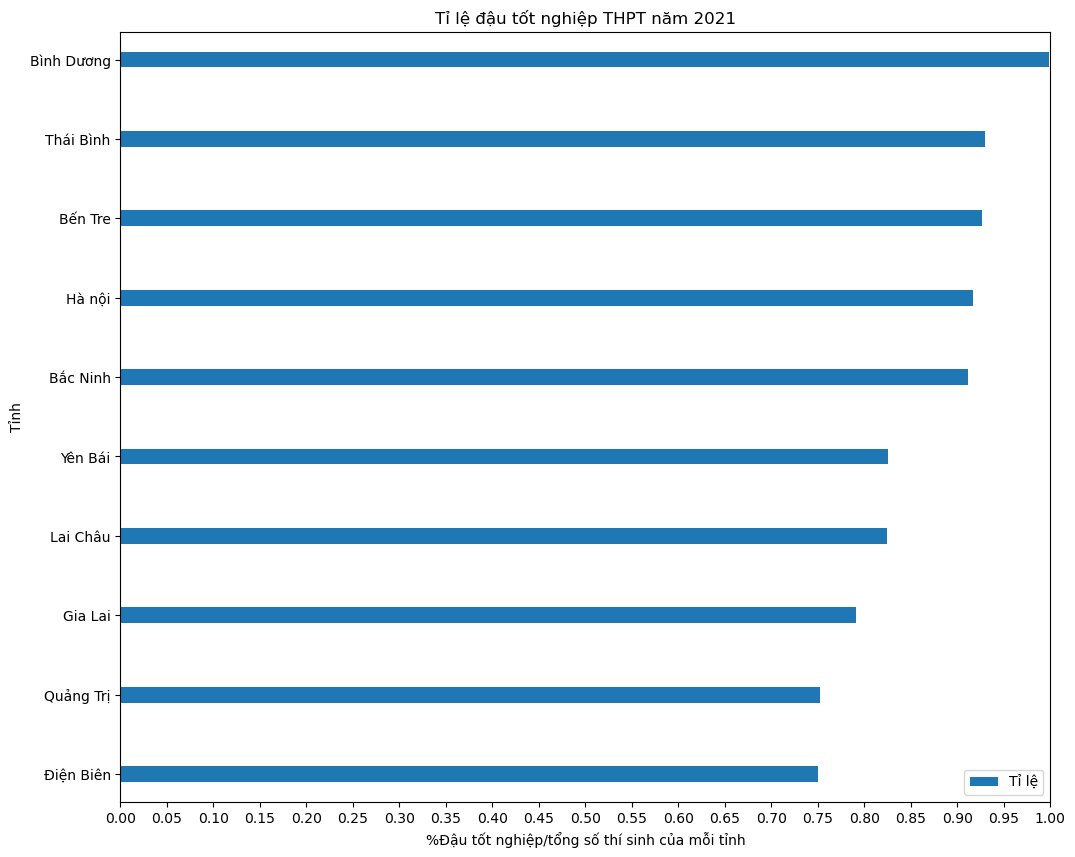

In [15]:
chart = []
print(Tile_2021)
for i in Tile_2021.keys(): 
    chart.append([i,Tile_2021[i]])
chart = pd.DataFrame(chart, columns= ['Tỉnh', 'Tỉ lệ'])
chart = chart.sort_values('Tỉ lệ', ascending=True)
chart = chart[chart['Tỉ lệ'] != 0]
chart_temp = chart.iloc[lambda x: x.index%6==0];
print(chart_temp)
chart_temp = chart_temp.set_index("Tỉnh")
chart_temp.plot.barh(figsize = (12,10), width = 0.2)
plt.xticks(np.arange(0, 1.05, step = 0.05))
plt.title("Tỉ lệ đậu tốt nghiệp THPT năm 2021")
plt.xlim(0,1)
plt.xlabel('%Đậu tốt nghiệp/tổng số thí sinh của mỗi tỉnh')

# Từ quan sát biểu đồ trên, ta có thể thấy : 
    + Sự chênh lệch tỉ lệ tốt nghiệp giữa tỉnh có tỉ lệ cao nhất và thấp nhất rất lớn.
    + Tỉnh có tỉ lệ tốt nghiệp cao nhất cả nước: Bình Dương với tỉ lệ đậu tốt nghiệp xấp xỉ 99,81%.
    + Tỉnh có tỉ lệ tốt nghiệp thấp nhất cả nước: Điện Biên: với tỉ lệ đậu tốt nghiệp là hơn 75.01%.
    + Có thể thấy các tỉnh có tỉ lệ tốt nghiệp thấp là những vùng có điều kiện cơ sở vật chất không tốt, những vùng sâu vùng xa và có thể là điều kiện kinh tế gia đình,...
    + Nhưng bên cạnh đó thì các tỉnh có điều kiện học tập tốt như Hà Nội, Đà Nẵng, Huế,... lại chưa có tỉ lệ đậu tốt nghiệp cao.
## => Những năm tới cần tập trung phát triển giáo dục đến những vùng khó khăn, phát triển chất lượng, số lượng giáo viên ở các vùng khó khăn. Còn ở các vùng đã có điều kiện thì cần phải cải thiện, tăng cường sự kiểm soát tới quá trình và trình độ học vấn của các thí sinh để có thể đưa ra biện pháp cái thiện phù hợp với từng hoàn cảnh.